In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df.shape

(918, 12)

In [6]:
df['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [7]:
df['RestingECG'].unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [8]:
df['ST_Slope'].unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [9]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})

In [11]:
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})

In [12]:
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,1,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,0,ATA,130,283,0,ST,98,0,0.0,Up,0


In [13]:
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True).astype(int)

In [14]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0,0,1,0,0,1,0,0,1
1,49,1,160,180,0,156,0,1,1,0,1,0,1,0,1,0
2,37,0,130,283,0,98,0,0,0,1,0,0,0,1,0,1
3,48,1,138,214,0,108,1,1,1,0,0,0,1,0,1,0
4,54,0,150,195,0,122,0,0,0,0,1,0,1,0,0,1


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] = scaler.fit_transform(df[['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']])

In [16]:
df['Age'] = df['Age']/100

In [17]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,0.40,0,0.410909,0.825070,0,1.382928,0,-0.727592,0,1,0,0,1,0,0,1
1,0.49,1,1.491752,-0.171961,0,0.754157,0,0.282891,1,0,1,0,1,0,1,0
2,0.37,0,-0.129513,0.770188,0,-1.525138,0,-0.727592,0,1,0,0,0,1,0,1
3,0.48,1,0.302825,0.139040,0,-1.132156,1,0.282891,1,0,0,0,1,0,1,0
4,0.54,0,0.951331,-0.034755,0,-0.581981,0,-0.727592,0,0,1,0,1,0,0,1


In [18]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

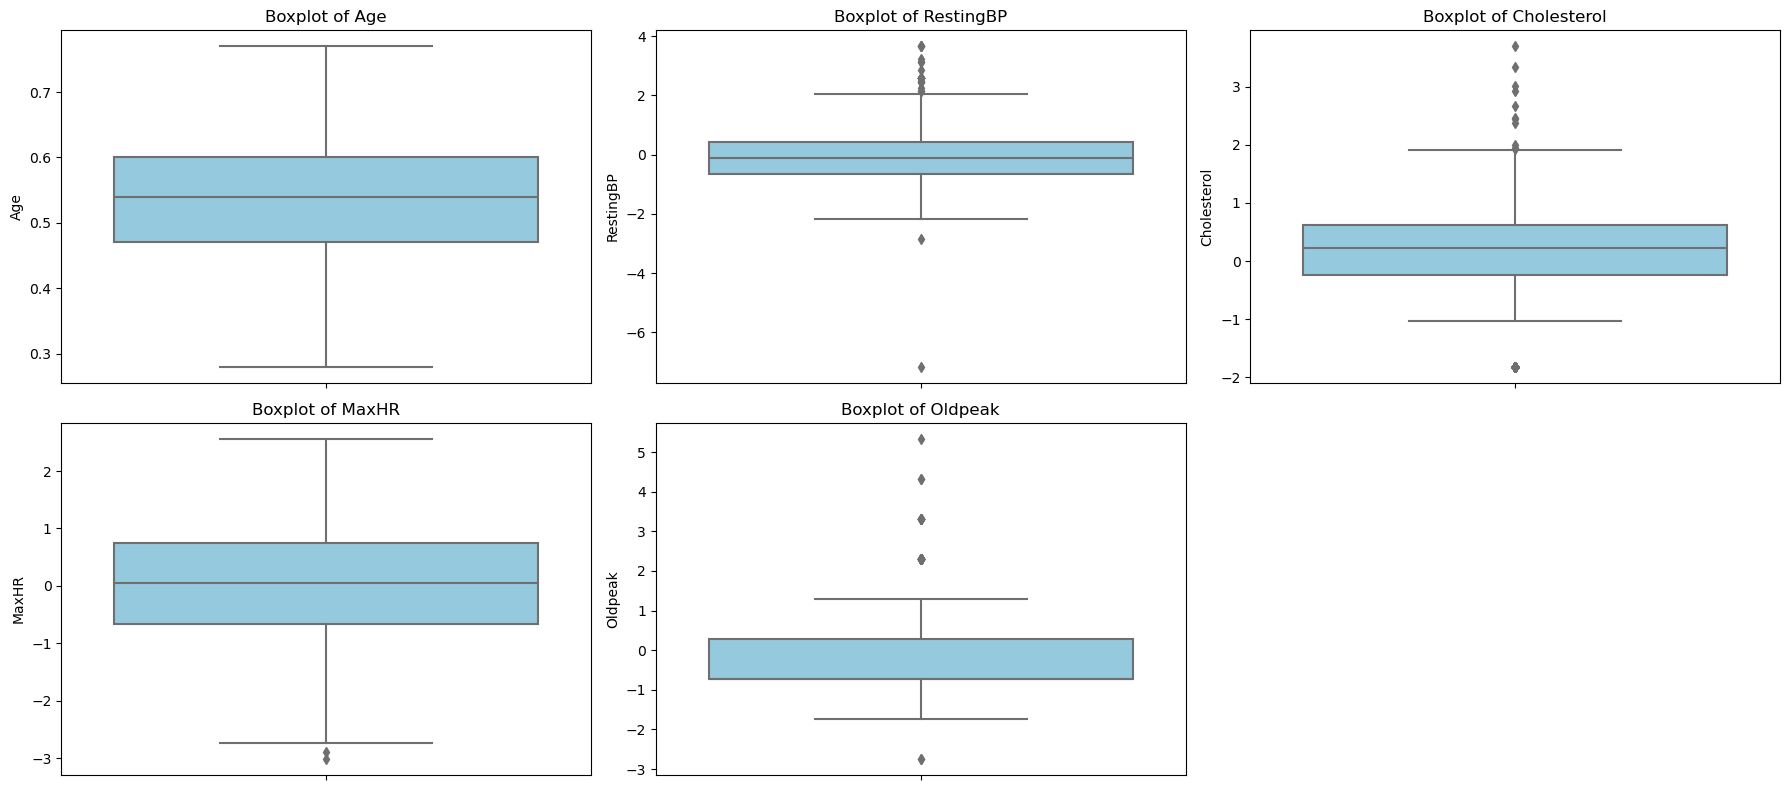

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the plot grid
num_cols = len(numeric_cols)
cols_per_row = 3
rows = (num_cols + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row * 6, rows * 4))

# Plot boxplots for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=12)
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


In [20]:
df.shape

(918, 16)

In [21]:
X = df.drop(['HeartDisease'], axis=1)
Y = df.HeartDisease

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(734, 15)

In [98]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.layers import BatchNormalization

model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(15,)),
    BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(6),
    BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(1, activation='sigmoid')
])

    
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=750)
    

Epoch 1/750


C:\Users\Sekhar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3781 - loss: 0.9816
Epoch 2/750
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4153 - loss: 0.8772
Epoch 3/750
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5006 - loss: 0.8144
Epoch 4/750
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5453 - loss: 0.7597
Epoch 5/750
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5984 - loss: 0.6943
Epoch 6/750
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6376 - loss: 0.6679
Epoch 7/750
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6669 - loss: 0.6517
Epoch 8/750
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7013 - loss: 0.6240
Epoch 9/750
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7001 - loss: 0.6273 
Epoch 10/750
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7487 - loss: 0.5935
Epoch 11/750
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7218 - loss: 0.5714
Epoch 12/750
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7251 - l

In [100]:
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9011 - loss: 0.3324  


[0.3179185390472412, 0.907608687877655]

In [104]:
model.save("heart_disease_detection_model.keras")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


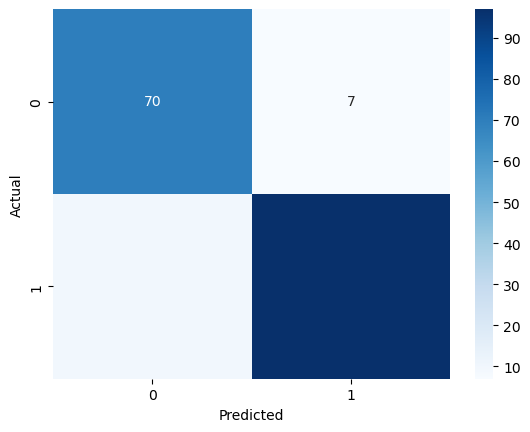

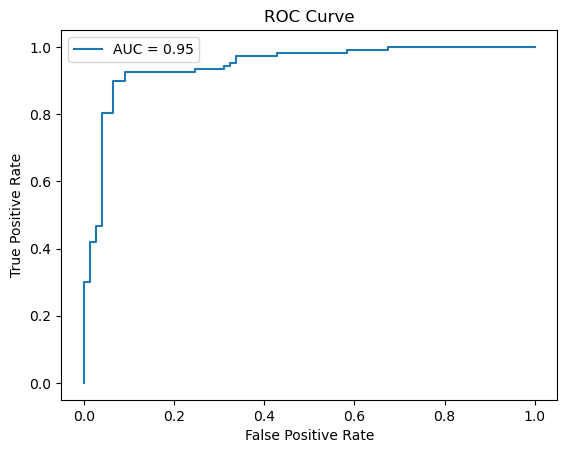

In [108]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype("int32")

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_proba):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve")
plt.show()


In [112]:
from sklearn.metrics import classification_report
Y_pred = model.predict(X_test)
y_pred = (Y_pred > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        77
           1       0.93      0.91      0.92       107

    accuracy                           0.91       184
   macro avg       0.90      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

